In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [129]:
df=pd.read_excel("merc.xlsx")

# VERİMİZİ TANIMA

In [130]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


In [133]:
df.shape

(13119, 7)

In [134]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

# VERİ Yİ TEMİZLEME

## transmission kolonunu sayısal ifadeye çevirdik newTransmission olarak kaydettik

In [135]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
df["newTransmission"]=lbe.fit_transform(df["transmission"])
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize,newTransmission
0,2005,5200,Automatic,63000,325,32.1,1.8,0
1,2017,34948,Automatic,27000,20,61.4,2.1,0
2,2016,49948,Automatic,6200,555,28.0,5.5,0
3,2016,61948,Automatic,16000,325,30.4,4.0,0
4,2016,73948,Automatic,4000,325,30.1,4.0,0


In [136]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,newTransmission
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530,1.676347
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426,1.413722
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000,0.000000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000,3.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000,3.000000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000,3.000000


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

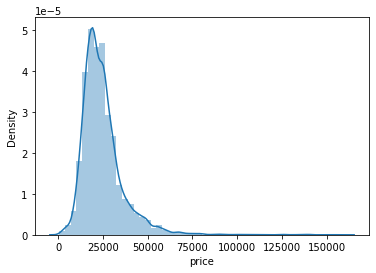

In [137]:
sns.distplot(df["price"])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

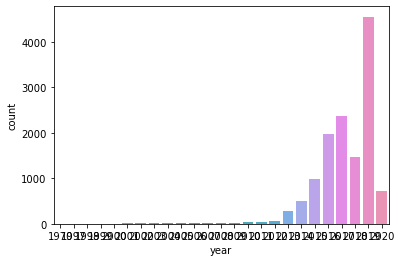

In [138]:
sns.countplot(df["year"])

## dataframe deki korelasyonlara baktık

In [139]:
df.corr()

,year,price,mileage,tax,mpg,engineSize,newTransmission
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147,0.229631
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126,0.141017
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652,-0.223316
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341,0.005091
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862,-0.023386
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000,-0.027505
newTransmission,0.229631,0.141017,-0.223316,0.005091,-0.023386,-0.027505,1.000000


In [140]:
df.corr()["price"].sort_values()

mileage           -0.537214
mpg               -0.438445
newTransmission    0.141017
tax                0.268717
engineSize         0.516126
year               0.520712
price              1.000000
Name: price, dtype: float64

In [141]:
df["newTransmission"].unique()

array([0, 1, 3, 2])

<AxesSubplot:xlabel='mileage', ylabel='price'>

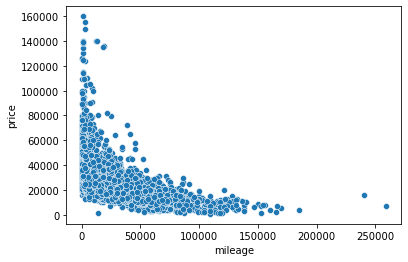

In [142]:
sns.scatterplot(x="mileage",y="price",data=df)

In [143]:
df.sort_values("price",ascending=False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize,newTransmission
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0,3
10044,2020,154998,Automatic,3000,150,21.4,4.0,0
5,2011,149948,Automatic,3000,570,21.4,6.2,0
8737,2019,140319,Semi-Auto,785,150,22.1,4.0,3
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0,3
8,2019,139948,Automatic,12000,145,21.4,4.0,0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0,3
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0,3
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0,3
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0,3


## en yüksek fiyatlı olan %10 luk kısmı çıkardık

In [144]:
df_temiz=df.sort_values("price",ascending=False).iloc[131:]

In [145]:
df_temiz["price"].max()

65990

In [146]:
df_temiz.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12988.0,2017.281876,2.228515,1970.0,2016.000,2018.0,2019.00,2020.0
price,12988.0,24074.926933,9866.224575,650.0,17357.500,22299.0,28706.00,65990.0
mileage,12988.0,22132.741146,21196.776401,1.0,6322.000,15369.5,31982.25,259000.0
tax,12988.0,129.689714,65.183076,0.0,125.000,145.0,145.00,580.0
mpg,12988.0,55.437142,15.025999,1.1,45.600,56.5,64.20,217.3
engineSize,12988.0,2.050901,0.532596,0.0,1.675,2.0,2.10,6.2
newTransmission,12988.0,1.675008,1.413103,0.0,0.000,3.0,3.00,3.0


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

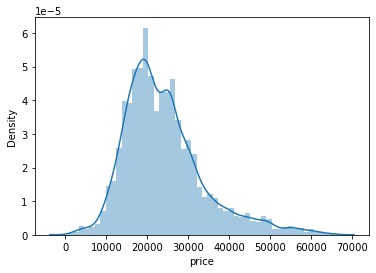

In [147]:
sns.distplot(df_temiz["price"])

In [148]:
df_temiz.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [149]:
df_temiz[df_temiz.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

## veri mizi bozan 1970 modelli araçları da veriden cıkardık

In [150]:
df_temiz=df_temiz[df_temiz.year != 1970]
df_temiz.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [151]:
df_temiz.head()

,year,price,transmission,mileage,tax,mpg,engineSize,newTransmission
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0,3
5779,2020,65990,Semi-Auto,999,145,28.0,4.0,3
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0,3
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0,3
8814,2019,64999,Semi-Auto,119,145,40.9,3.0,3


## reg modelimiz sadece sayısal değişkenleri işlediği için transmission kolonunu sildik

In [152]:
df_temiz=df_temiz.drop("transmission",axis=1)
df_temiz.head()

,year,price,mileage,tax,mpg,engineSize,newTransmission
6177,2019,65990,5076,150,30.4,3.0,3
5779,2020,65990,999,145,28.0,4.0,3
3191,2020,65980,3999,145,28.0,4.0,3
4727,2019,65000,3398,145,27.2,4.0,3
8814,2019,64999,119,145,40.9,3.0,3


# _MODEL OLUŞTURMA ADIMLARI_

In [153]:
y= df_temiz["price"].values
x=df_temiz.drop(["price"],axis=1).values

In [154]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [155]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00,
        3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00,
        3.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00,
        3.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00,
        0.00000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00,
        1.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00,
        1.00000e+00]])

In [156]:
from sklearn.model_selection import train_test_split

## test ve train verilerini ayırdık

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.30, random_state=10)

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
scaler=MinMaxScaler()

In [160]:
x_train=scaler.fit_transform(x_train)

In [161]:
x_test=scaler.transform(x_test)

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [163]:
x_train.shape

(9090, 6)

## model oluşturduk. 5 katman ve 12 nöronlu 

In [164]:
model=Sequential()
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss= "mse")

## model i fit ettik 350 şer veri gönderdik ve 300 defa validasyon yaptık

In [165]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=350,epochs=300)

Epoch 1/300
26/26 [==============================] - 1s 9ms/step - loss: 672149184.0000 - val_loss: 688112128.0000
Epoch 2/300
26/26 [==============================] - 0s 4ms/step - loss: 672142272.0000 - val_loss: 688099520.0000
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 672112960.0000 - val_loss: 688044160.0000
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 672006848.0000 - val_loss: 687846656.0000
Epoch 5/300
26/26 [==============================] - 0s 4ms/step - loss: 671612608.0000 - val_loss: 687115520.0000
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 670198144.0000 - val_loss: 684594944.0000
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 665771200.0000 - val_loss: 677219776.0000
Epoch 8/300
26/26 [==============================] - 0s 3ms/step - loss: 653895232.0000 - val_loss: 658784768.0000
Epoch 9/300
26/26 [==============================] - 0s 3ms/step - loss: 6265296

26/26 [==============================] - 0s 3ms/step - loss: 53933468.0000 - val_loss: 55176212.0000
Epoch 73/300
26/26 [==============================] - 0s 3ms/step - loss: 53125840.0000 - val_loss: 54383420.0000
Epoch 74/300
26/26 [==============================] - 0s 3ms/step - loss: 52310516.0000 - val_loss: 53571580.0000
Epoch 75/300
26/26 [==============================] - 0s 3ms/step - loss: 51517984.0000 - val_loss: 52784976.0000
Epoch 76/300
26/26 [==============================] - 0s 3ms/step - loss: 50646472.0000 - val_loss: 51886360.0000
Epoch 77/300
26/26 [==============================] - 0s 3ms/step - loss: 49820136.0000 - val_loss: 51033564.0000
Epoch 78/300
26/26 [==============================] - 0s 3ms/step - loss: 48914040.0000 - val_loss: 50158132.0000
Epoch 79/300
26/26 [==============================] - 0s 3ms/step - loss: 48057204.0000 - val_loss: 49260612.0000
Epoch 80/300
26/26 [==============================] - 0s 3ms/step - loss: 47165016.0000 - val_loss: 4

26/26 [==============================] - 0s 3ms/step - loss: 21314958.0000 - val_loss: 22613432.0000
Epoch 144/300
26/26 [==============================] - 0s 3ms/step - loss: 21240096.0000 - val_loss: 22605530.0000
Epoch 145/300
26/26 [==============================] - 0s 3ms/step - loss: 21177676.0000 - val_loss: 22563872.0000
Epoch 146/300
26/26 [==============================] - 0s 3ms/step - loss: 21113098.0000 - val_loss: 22481696.0000
Epoch 147/300
26/26 [==============================] - 0s 3ms/step - loss: 21076116.0000 - val_loss: 22435920.0000
Epoch 148/300
26/26 [==============================] - 0s 2ms/step - loss: 21037260.0000 - val_loss: 22402502.0000
Epoch 149/300
26/26 [==============================] - 0s 3ms/step - loss: 20993588.0000 - val_loss: 22373034.0000
Epoch 150/300
26/26 [==============================] - 0s 4ms/step - loss: 20955102.0000 - val_loss: 22409410.0000
Epoch 151/300
26/26 [==============================] - 0s 4ms/step - loss: 21017232.0000 - val

26/26 [==============================] - 0s 3ms/step - loss: 19336428.0000 - val_loss: 20857834.0000
Epoch 215/300
26/26 [==============================] - 0s 3ms/step - loss: 19336606.0000 - val_loss: 20833820.0000
Epoch 216/300
26/26 [==============================] - 0s 3ms/step - loss: 19308152.0000 - val_loss: 20828494.0000
Epoch 217/300
26/26 [==============================] - 0s 3ms/step - loss: 19282918.0000 - val_loss: 20805300.0000
Epoch 218/300
26/26 [==============================] - 0s 3ms/step - loss: 19269382.0000 - val_loss: 20790488.0000
Epoch 219/300
26/26 [==============================] - 0s 2ms/step - loss: 19251620.0000 - val_loss: 20786196.0000
Epoch 220/300
26/26 [==============================] - 0s 3ms/step - loss: 19250788.0000 - val_loss: 20761688.0000
Epoch 221/300
26/26 [==============================] - 0s 2ms/step - loss: 19257086.0000 - val_loss: 20778030.0000
Epoch 222/300
26/26 [==============================] - 0s 3ms/step - loss: 19208644.0000 - val

26/26 [==============================] - 0s 3ms/step - loss: 18519476.0000 - val_loss: 20040594.0000
Epoch 286/300
26/26 [==============================] - 0s 3ms/step - loss: 18464264.0000 - val_loss: 20002340.0000
Epoch 287/300
26/26 [==============================] - 0s 3ms/step - loss: 18458936.0000 - val_loss: 19995482.0000
Epoch 288/300
26/26 [==============================] - 0s 4ms/step - loss: 18443542.0000 - val_loss: 20041768.0000
Epoch 289/300
26/26 [==============================] - 0s 3ms/step - loss: 18442062.0000 - val_loss: 20001050.0000
Epoch 290/300
26/26 [==============================] - 0s 3ms/step - loss: 18452960.0000 - val_loss: 20002376.0000
Epoch 291/300
26/26 [==============================] - 0s 4ms/step - loss: 18416054.0000 - val_loss: 19945998.0000
Epoch 292/300
26/26 [==============================] - 0s 2ms/step - loss: 18414756.0000 - val_loss: 19955838.0000
Epoch 293/300
26/26 [==============================] - 0s 3ms/step - loss: 18421056.0000 - val

In [166]:
kayipVeri=pd.DataFrame(model.history.history)

In [167]:
kayipVeri.head()

,loss,val_loss
0,672149184.0,688112128.0
1,672142272.0,688099520.0
2,672112960.0,688044160.0
3,672006848.0,687846656.0
4,671612608.0,687115520.0


In [168]:
kayipVeri.tail()

,loss,val_loss
295,18376666.0,19902572.0
296,18405212.0,20154400.0
297,18407464.0,20007426.0
298,18324200.0,19885008.0
299,18328960.0,19883256.0


<AxesSubplot:>

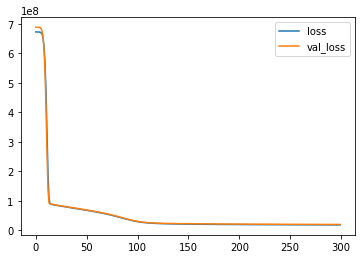

In [169]:
kayipVeri.plot()

In [170]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [171]:
tahmin=model.predict(x_test)
tahmin

122/122 [==============================] - 0s 1ms/step


array([[22136.18 ],
       [23047.057],
       [25322.105],
       ...,
       [26505.688],
       [14299.973],
       [25126.59 ]], dtype=float32)

In [172]:
df_tahmin=pd.DataFrame(tahmin,columns=["tahmin"])
df_tahmin["gerçek"]=pd.DataFrame(y_test)
df_tahmin.head()

,tahmin,gerçek
0,22136.179688,20995
1,23047.056641,19791
2,25322.105469,27791
3,41204.539062,43500
4,15152.513672,13999


# modelimizin sapma miktarını bulduk

In [173]:
mean_absolute_error(y_test,tahmin)

3137.9934089235812

In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2
newTransmission,13119.0,1.676347,1.413722,0.0,0.0,3.0,3.0,3.0


<AxesSubplot:xlabel='tahmin', ylabel='gerçek'>

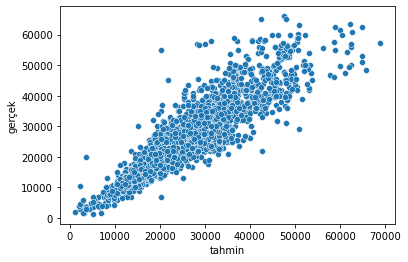

In [175]:
sns.scatterplot(data=df_tahmin, x="tahmin" ,y="gerçek")